In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 야후 finance에서 데이터를 읽어오기 위한 모듈
# pip install yfinance
import yfinance

In [4]:
# 주가 데이터를 불러온다.
samsung = yfinance.download('005930.KS', '2010-01-01', '2026-12-31')
samsung

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2010-01-04,11925.163086,11925.163086,11792.497489,11836.719355,11950800
2010-01-05,12116.787109,12219.971428,12013.602791,12175.749577,27925850
2010-01-06,12396.859375,12396.859375,12175.750111,12219.971964,22948850
2010-01-07,11984.121094,12396.858352,11984.121094,12396.858352,22107950
2010-01-08,12102.044922,12102.044922,11880.935697,12087.304307,14777550
...,...,...,...,...,...
2026-01-19,149300.000000,150600.000000,146600.000000,147200.000000,22762497
2026-01-20,145200.000000,149300.000000,143900.000000,148500.000000,24059218


In [5]:
# 컬럼명 변경
samsung.columns = ['종가', '최고가', '최저가', '시작가', '거래량']
samsung

,종가,최고가,최저가,시작가,거래량
Date,,,,,
2010-01-04,11925.163086,11925.163086,11792.497489,11836.719355,11950800
2010-01-05,12116.787109,12219.971428,12013.602791,12175.749577,27925850
2010-01-06,12396.859375,12396.859375,12175.750111,12219.971964,22948850
2010-01-07,11984.121094,12396.858352,11984.121094,12396.858352,22107950
2010-01-08,12102.044922,12102.044922,11880.935697,12087.304307,14777550
...,...,...,...,...,...
2026-01-19,149300.000000,150600.000000,146600.000000,147200.000000,22762497
2026-01-20,145200.000000,149300.000000,143900.000000,148500.000000,24059218
2026-01-21,149500.000000,149800.000000,141800.000000,141900.000000,31703610


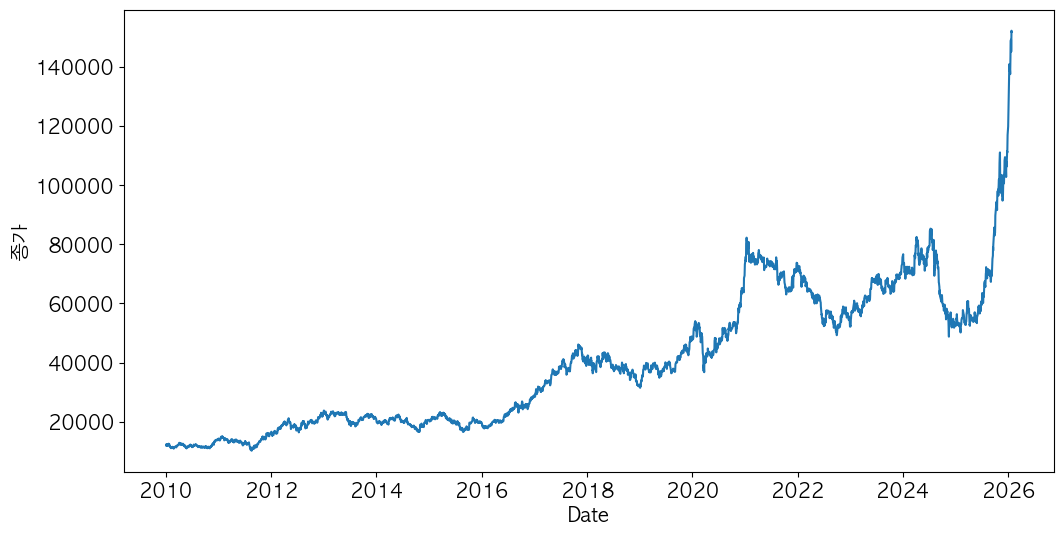

In [6]:
# 종가를 시각화한다.
sns.lineplot(data=samsung, x=samsung.index, y='종가')
plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [8]:
advenced_decopostion = STL(samsung['종가'], period=4).fit()

print('관측값')
print(advenced_decopostion.observed)

print('추세')
print(advenced_decopostion.trend)

print('계절성')
print(advenced_decopostion.seasonal)

print('차분')
print(advenced_decopostion.resid)

관측값
Date
2010-01-04     11925.163086
2010-01-05     12116.787109
2010-01-06     12396.859375
2010-01-07     11984.121094
2010-01-08     12102.044922
                  ...      
2026-01-19    149300.000000
2026-01-20    145200.000000
2026-01-21    149500.000000
2026-01-22    152300.000000
2026-01-23    151900.000000
Name: 종가, Length: 3951, dtype: float64
추세
Date
2010-01-04     12061.234621
2010-01-05     12055.037842
2010-01-06     12046.762765
2010-01-07     12036.121604
2010-01-08     12000.247542
                  ...      
2026-01-19    147424.255584
2026-01-20    148257.774978
2026-01-21    148615.986969
2026-01-22    148797.747221
2026-01-23    148926.575187
Name: trend, Length: 3951, dtype: float64
계절성
Date
2010-01-04     -31.468499
2010-01-05      -8.323774
2010-01-06     212.990616
2010-01-07    -178.785501
2010-01-08     -17.483872
                 ...     
2026-01-19     791.330620
2026-01-20   -2962.607263
2026-01-21    -362.041316
2026-01-22    2457.442987
2026-01-23    177

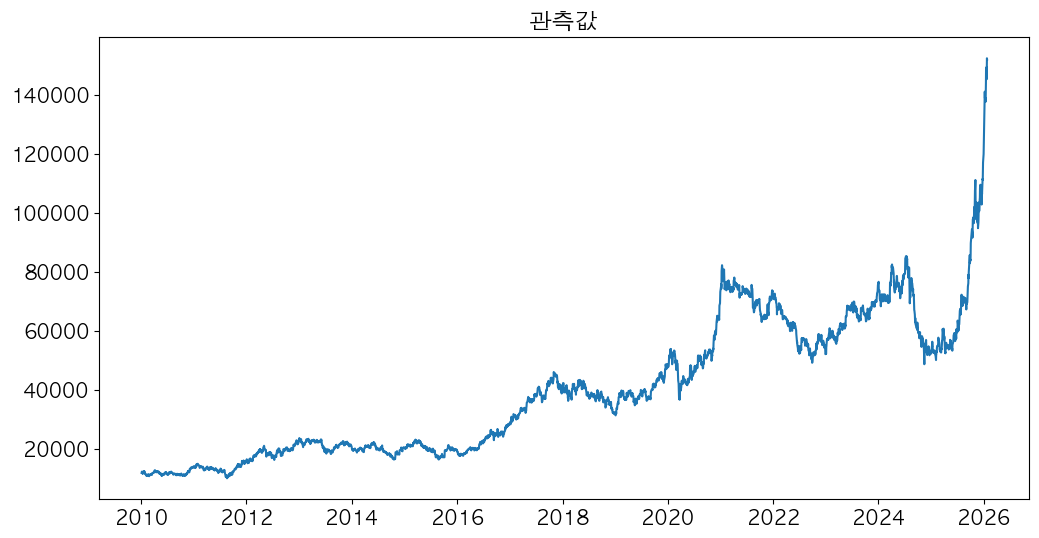

In [9]:
plt.plot(advenced_decopostion.observed)
plt.title('관측값')
plt.show()

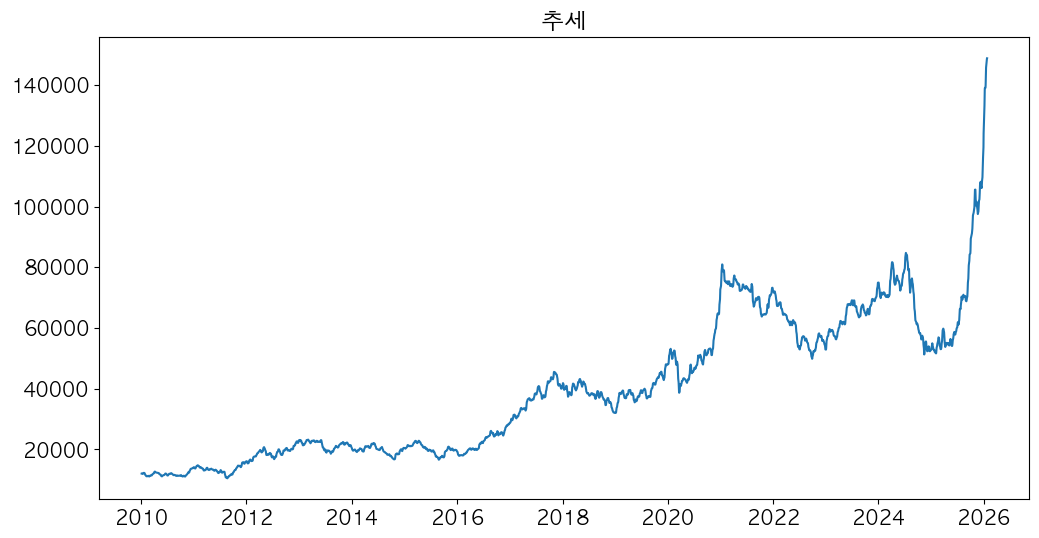

In [10]:
plt.plot(advenced_decopostion.trend)
plt.title('추세')
plt.show()

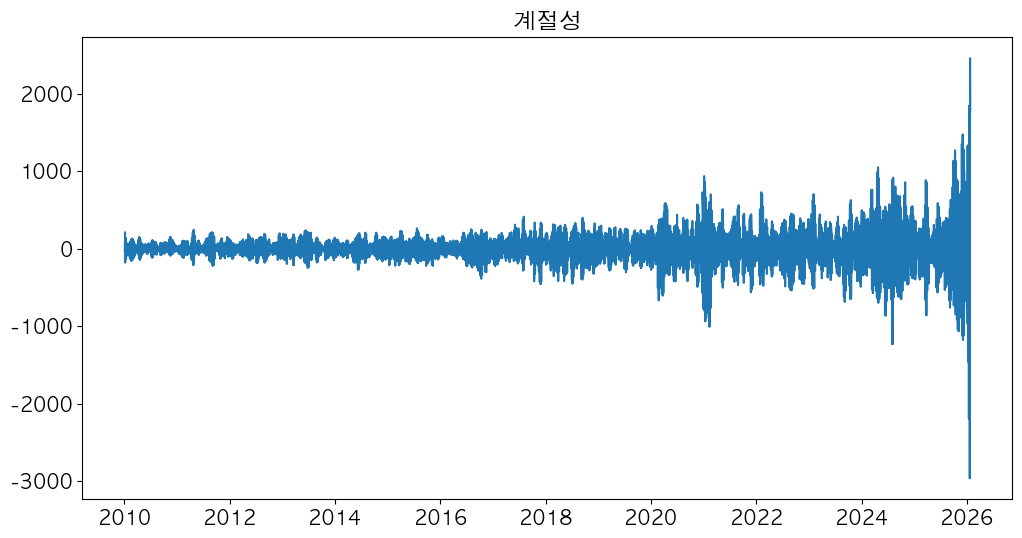

In [11]:
plt.plot(advenced_decopostion.seasonal)
plt.title('계절성')
plt.show()

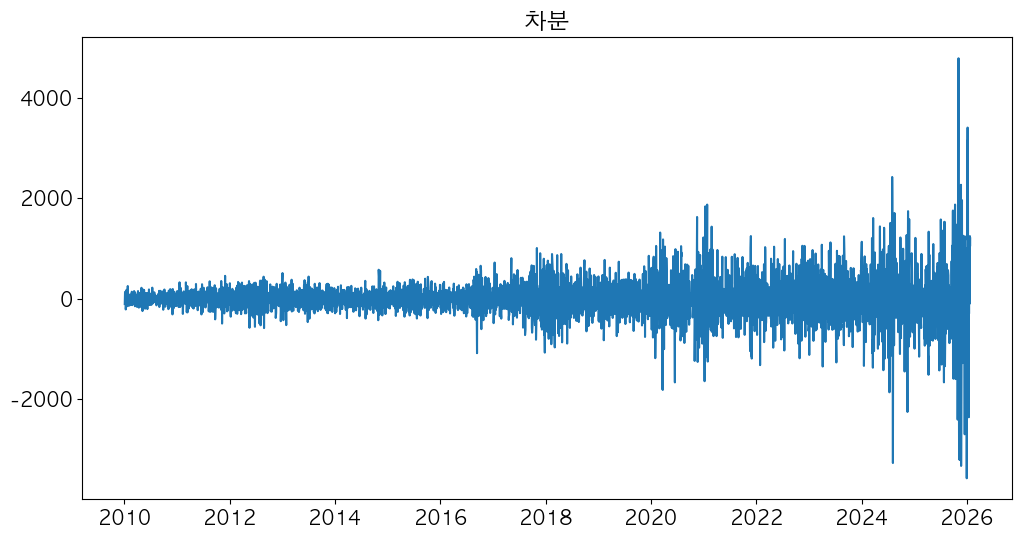

In [12]:
# 얼마나 오르고 떨어지는가
plt.plot(advenced_decopostion.resid)
plt.title('차분')
plt.show()

### 각 특징을 잘 확인해볼 수 있는 데이터를 사용해본다.

In [14]:
jj_df = pd.read_csv('data/jj.csv')
jj_df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


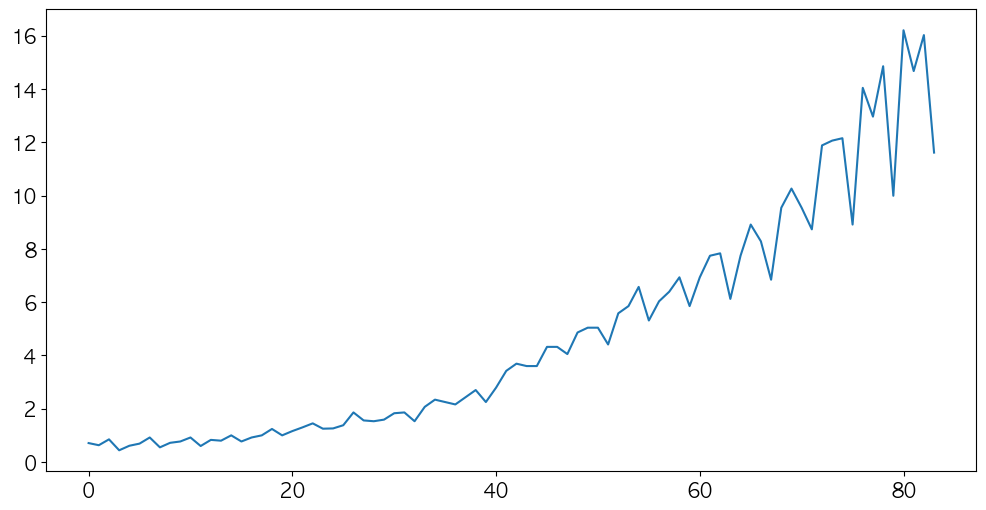

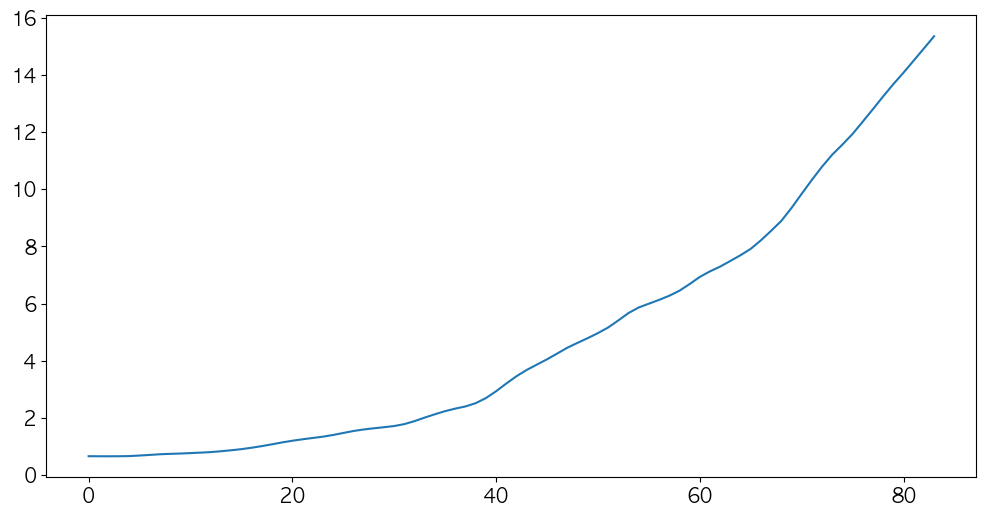

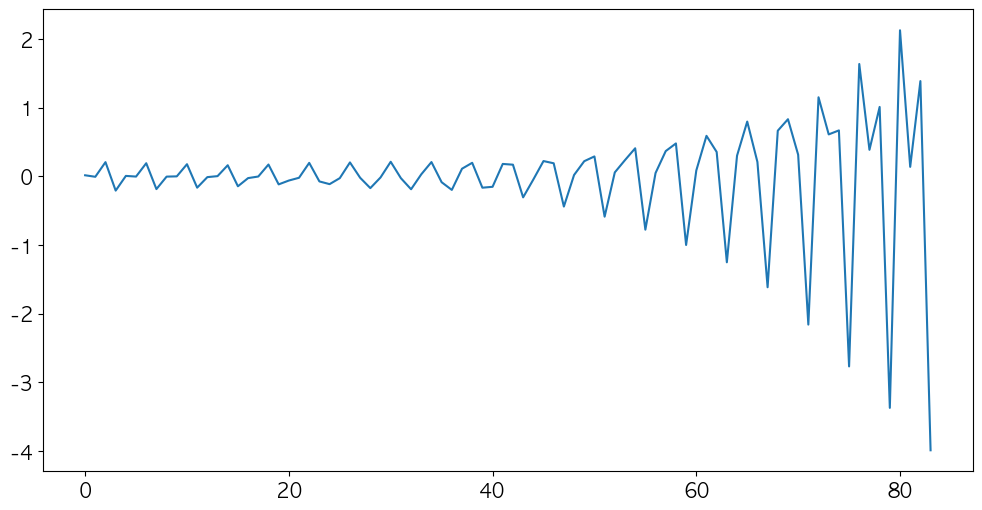

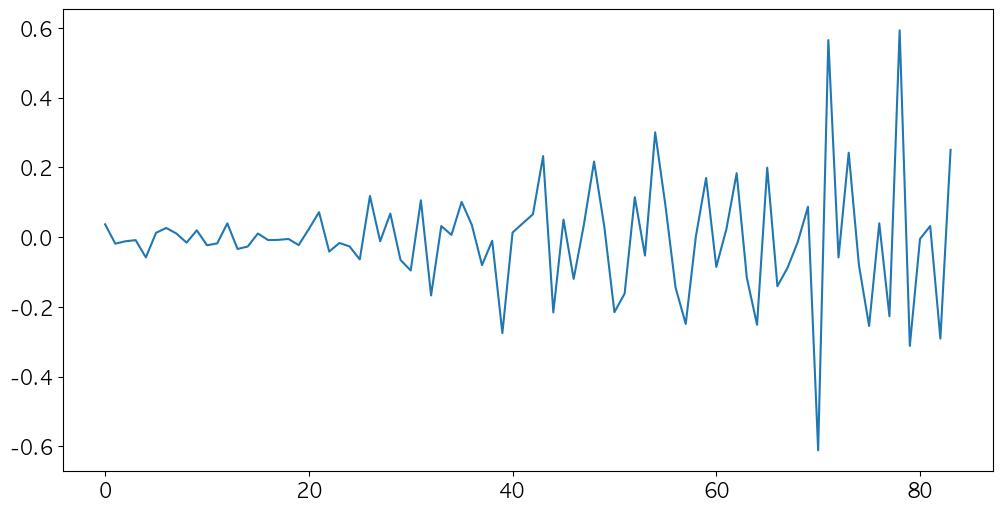

In [15]:
ad2 = STL(jj_df['data'], period=4).fit()

plt.plot(ad2.observed)
plt.show()

plt.plot(ad2.trend)
plt.show()

plt.plot(ad2.seasonal)
plt.show()

plt.plot(ad2.resid)
plt.show()

- observed (관측값) : 실제 값
- trend (추세) : 전체적으로 오르고 떨어지는 진행 상황을 해석할 수 있다.
- seasonal (계절성) : 1년을 4등분 하여 각 분기별로 오르고 떨어짐을 확인해볼 수 있다.
- resid (차분) : 이전에 비해 얼마나 오르고 떨어지는가..

### 삼성전자 주가 데이터 분석 (일별 수익률 확인)

In [16]:
# 종가가 이전 날짜보다 얼마나 차이가 나는가...
samsung['종가'].diff()

Date
2010-01-04            NaN
2010-01-05     191.624023
2010-01-06     280.072266
2010-01-07    -412.738281
2010-01-08     117.923828
                 ...     
2026-01-19     400.000000
2026-01-20   -4100.000000
2026-01-21    4300.000000
2026-01-22    2800.000000
2026-01-23    -400.000000
Name: 종가, Length: 3951, dtype: float64

In [17]:
# 이전 날짜와 비교한 등록 비율 (0 ~ 1)
samsung['종가'].pct_change()

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2026-01-19    0.002686
2026-01-20   -0.027461
2026-01-21    0.029614
2026-01-22    0.018729
2026-01-23   -0.002626
Name: 종가, Length: 3951, dtype: float64

In [18]:
a1 = samsung['종가'].pct_change()
np.sum(a1)

np.float64(3.137773633003709)

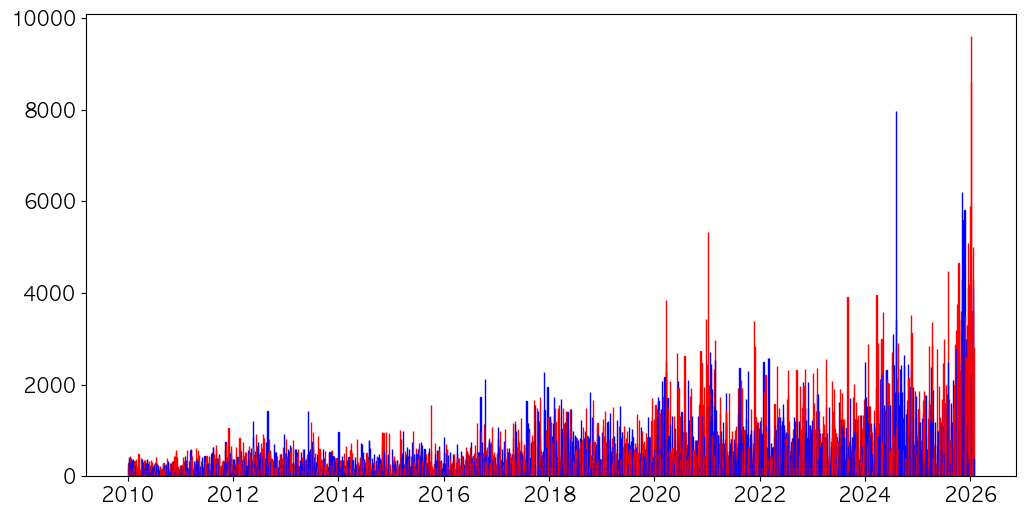

In [19]:
# 등록폭의 그래프를 그려본다.
a1 = samsung['종가'].diff()
# 그린다.
bar_list = plt.bar(a1.index, abs(a1.values))

# 값이 0보다 크면 빨간색, 그렇지 않으면 파란색으로 표시한다.
for idx, value in enumerate(a1.values) :
    if value > 0 :
        bar_list[idx].set_color('r')
    else :
        bar_list[idx].set_color('b')

plt.show()

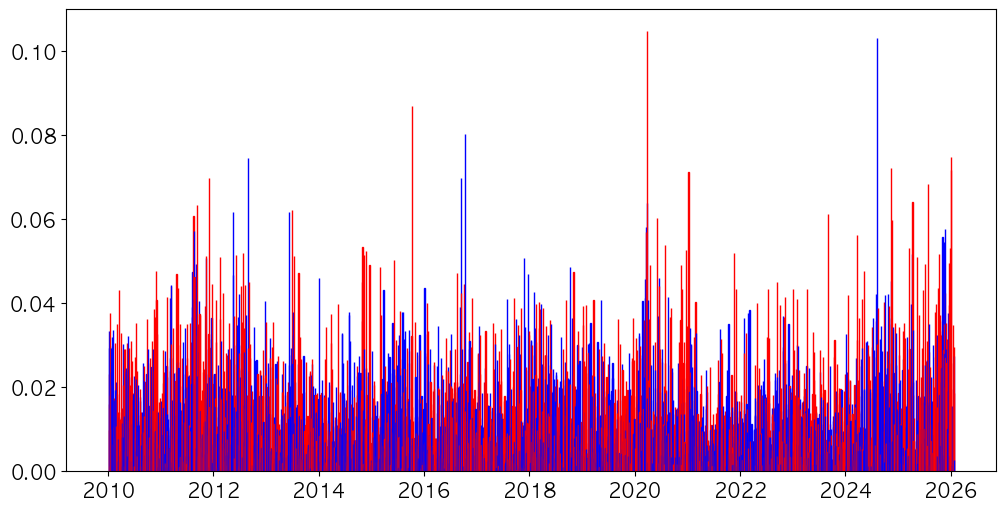

In [20]:
# 등락율의 그래프를 그려본다.
a1 = samsung['종가'].pct_change()
# 그린다.
bar_list = plt.bar(a1.index, abs(a1.values))

# 값이 0보다 크면 빨간색, 그렇지 않으면 파란색으로 표시한다.
for idx, value in enumerate(a1.values) :
    if value > 0 :
        bar_list[idx].set_color('r')
    else :
        bar_list[idx].set_color('b')

plt.show()

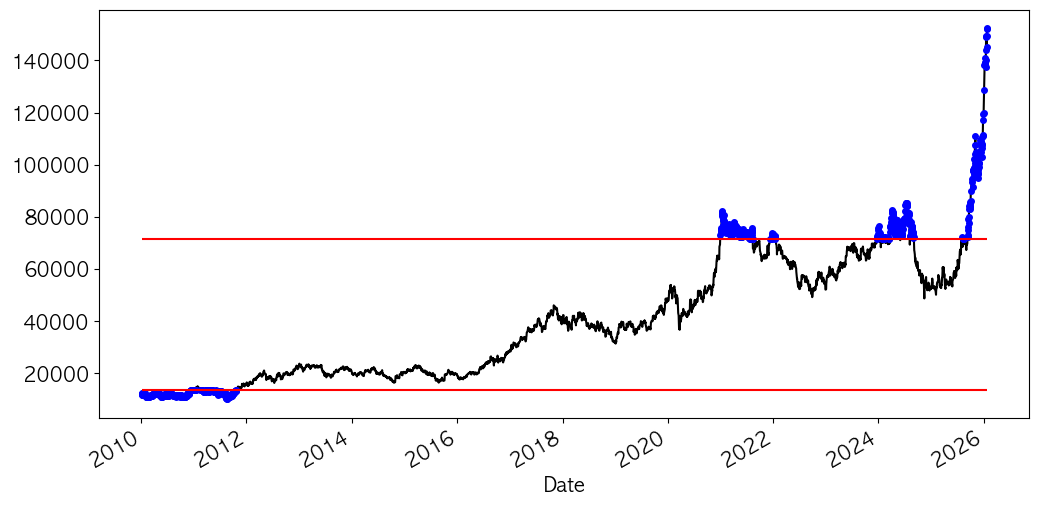

In [21]:
# 종가를 시각화 한다.
cel_close = samsung['종가']
cel_close.plot(color='black')

# 종가의 10% 위치와 90% 위치에 표시를 한다.
value_10 = cel_close.quantile(0.1)
value_90 = cel_close.quantile(0.9)

# 10% 이하이거나 90% 이상인 데이터를 가져온다.
samsung1090 = samsung.query('종가 <= @value_10 or 종가 >= @value_90')
cel_close_1090 = samsung1090['종가']
# 그려준다.
cel_close_1090.plot(style=' ', marker='o', ms=4, color='blue')

# 선의 시작점으로 사용할 첫 날짜
index_min = cel_close.index[0]
# 선의 끝점으로 사용할 마지막 날짜
index_max = cel_close.index[-1]

plt.hlines(xmin=index_min, xmax=index_max, y=[value_10, value_90], color='r')

plt.show()

### 종가와 거래량은 상관관계가 있는가?
- 상관 분석을 시행을 한다.

In [22]:
close = samsung['종가']
volume = samsung['거래량']

display(close)
display(volume)

Date
2010-01-04     11925.163086
2010-01-05     12116.787109
2010-01-06     12396.859375
2010-01-07     11984.121094
2010-01-08     12102.044922
                  ...      
2026-01-19    149300.000000
2026-01-20    145200.000000
2026-01-21    149500.000000
2026-01-22    152300.000000
2026-01-23    151900.000000
Name: 종가, Length: 3951, dtype: float64

Date
2010-01-04    11950800
2010-01-05    27925850
2010-01-06    22948850
2010-01-07    22107950
2010-01-08    14777550
                ...   
2026-01-19    22762497
2026-01-20    24059218
2026-01-21    31703610
2026-01-22    32073624
2026-01-23    19670184
Name: 거래량, Length: 3951, dtype: int64

In [23]:
# 상관 분석
corr, p_val = stats.pearsonr(close, volume)
print(f'피어슨 상관 계수 : {corr}')
print(f'p value : {p_val}')

피어슨 상관 계수 : 0.1890728804002127
p value : 4.053859803468125e-33


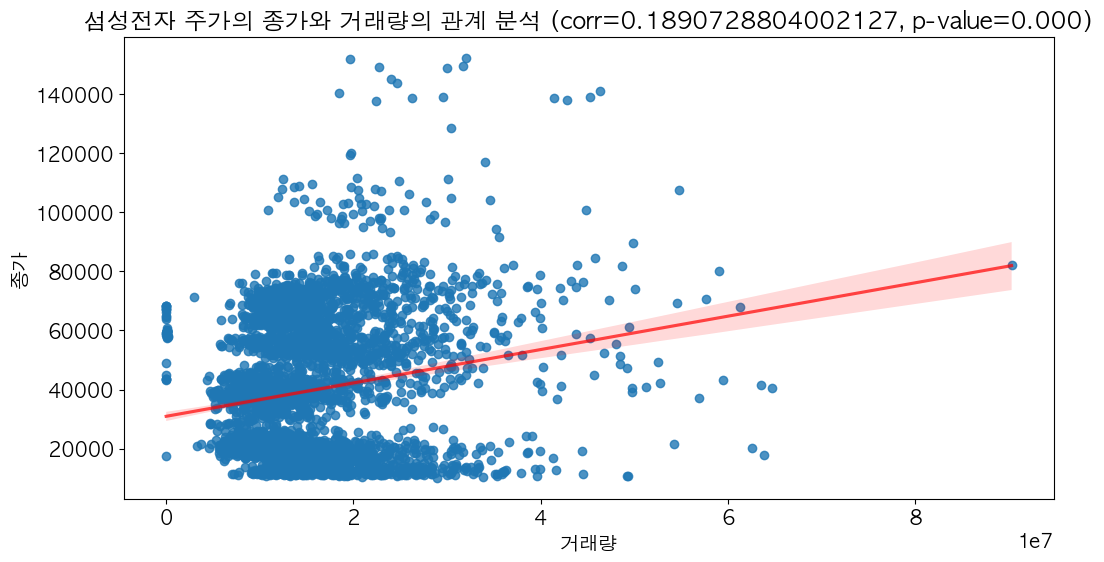

In [24]:
# 시각화
sns.regplot(x=volume, y=close, line_kws={'color':'red', 'alpha' : 0.7})
plt.title(f'섬성전자 주가의 종가와 거래량의 관계 분석 (corr={corr}, p-value={p_val:.3f})')
plt.show()

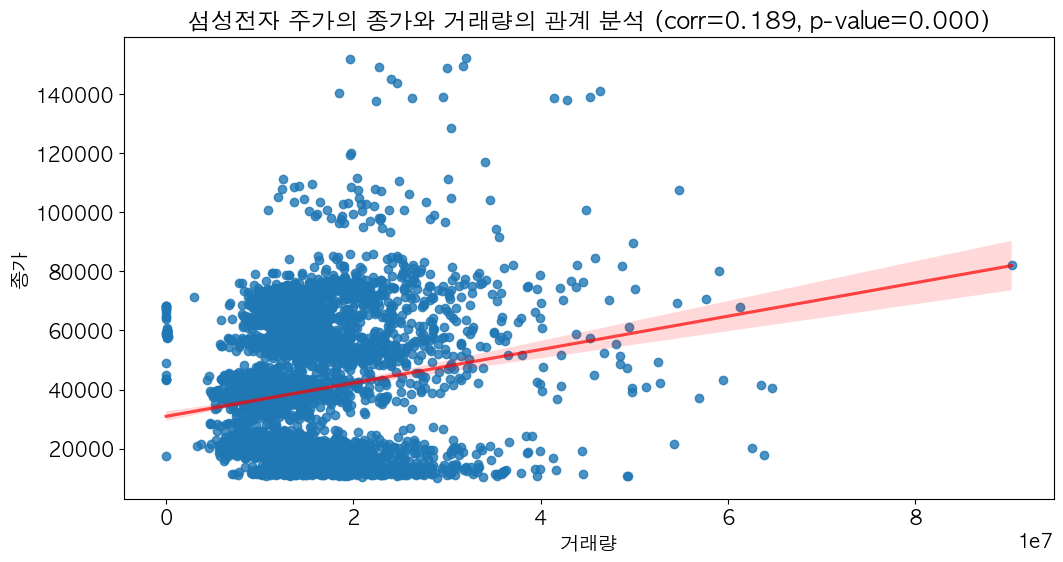

In [25]:
# 시각화
sns.regplot(x=volume, y=close, line_kws={'color':'red', 'alpha' : 0.7})
plt.title(f'섬성전자 주가의 종가와 거래량의 관계 분석 (corr={corr:.3f}, p-value={p_val:.3f})')
plt.show()

- 상관 관계 분석 결과 p-value가 0.05보다 작은 0.00000 이므로 "종가와 거래량은 서로 유의미한 상관관계가 없다"라는 귀무가설을 기각한다.

### 거래량의 증가하면 종가도 오를 것인가?

In [31]:
close_diff = samsung['종가'].diff()
# 제일 처음 것을 제외한다.
close_diff = close_diff.iloc[1:]
close_diff

Date
2010-01-05     191.624023
2010-01-06     280.072266
2010-01-07    -412.738281
2010-01-08     117.923828
2010-01-11    -353.773438
                 ...     
2026-01-19     400.000000
2026-01-20   -4100.000000
2026-01-21    4300.000000
2026-01-22    2800.000000
2026-01-23    -400.000000
Name: 종가, Length: 3950, dtype: float64

In [32]:
# 거래량
volume = samsung['거래량']
# 제일 처음 것은 제외한다.
volume = volume.iloc[1:]
volume

Date
2010-01-05    27925850
2010-01-06    22948850
2010-01-07    22107950
2010-01-08    14777550
2010-01-11    19896100
                ...   
2026-01-19    22762497
2026-01-20    24059218
2026-01-21    31703610
2026-01-22    32073624
2026-01-23    19670184
Name: 거래량, Length: 3950, dtype: int64

In [33]:
# 상수항 붙혀준다.
import statsmodels.api as sm

X = sm.add_constant(volume)
X

,const,거래량
Date,,
2010-01-05,1.0,27925850
2010-01-06,1.0,22948850
2010-01-07,1.0,22107950
2010-01-08,1.0,14777550
2010-01-11,1.0,19896100
...,...,...
2026-01-19,1.0,22762497
2026-01-20,1.0,24059218
2026-01-21,1.0,31703610


In [34]:
# 행렬로 가져온다.
X_array = X.values
X_array

array([[1.0000000e+00, 2.7925850e+07],
       [1.0000000e+00, 2.2948850e+07],
       [1.0000000e+00, 2.2107950e+07],
       ...,
       [1.0000000e+00, 3.1703610e+07],
       [1.0000000e+00, 3.2073624e+07],
       [1.0000000e+00, 1.9670184e+07]], shape=(3950, 2))

In [35]:
# OLS 모델 생성 및 학습
model = sm.OLS(close_diff, X_array).fit()

In [36]:
# 예측값 생성
pred_y = model.predict(X_array)
pred_y

array([130.59399919,  92.79964966,  86.41402207, ..., 159.28155834,
       162.09137117,  67.90211123], shape=(3950,))

In [38]:
# R-squared (결정 계수) : 모델의 점수 (0 ~ 1). 0.6 이상이면 보통 쓸만하다고 판단.
print(model.rsquared)
# 회귀 계수 : X가 1증가할 때 Y가 얼마나 변화하는가
print(f'{model.params[1]:.5f}')
# p value
print(f'{model.pvalues[1]:.5f}')

0.0049936450210392724
0.00001
0.00001


/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_4731/3166062932.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{model.params[1]:.5f}')
/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_4731/3166062932.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{model.pvalues[1]:.5f}')


/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_4731/1572511583.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'회귀 분석 : R-squared - {model.rsquared:.3f}, p-value : {model.pvalues[1]:.3f}')


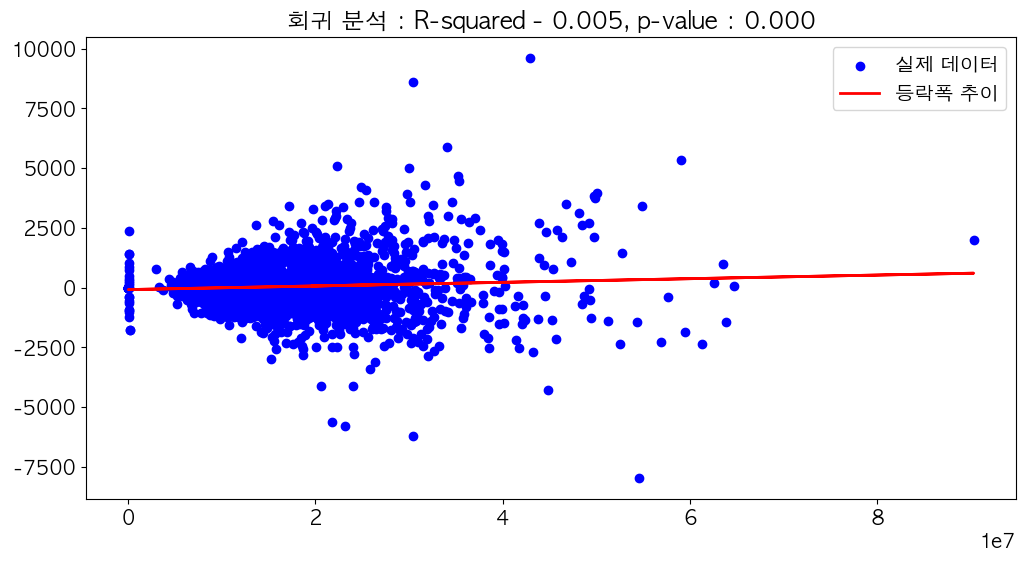

In [39]:
# 시각화

# 산점도 : 실제 데이터의 분포
plt.scatter(volume, close_diff, color='blue', label='실제 데이터')

# 회귀선

plt.plot(volume, pred_y, color='red', linewidth=2, label='등락폭 추이')

plt.title(f'회귀 분석 : R-squared - {model.rsquared:.3f}, p-value : {model.pvalues[1]:.3f}')

plt.legend()
plt.show()

- 회귀 분석의 결과 p value가 0.05보다 작은 0.00001 이므로 '거래량이 달라지더라도 종가 등락폭에는 영향을 미치지 않는다'는 귀무 가설을 기각한다.
- 따라서 '거래량은 종가 등락폭에 영향을 미친다.'
- 우리가 학습 시킨 모델의 결정 계수는 0.00001을 보이고 있으므로 이 선형회귀 모델이 예측하는 결과는 약 +- 99.98% 정도의 오차를 보인다. 따라서 이 모델을 통해 등락폭을 예측하기에는 어렵다.